In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [0]:
T         = 50    # total time to sumulate (msec)
dt        = 0.0125 # Simulation timestep
time      = int(T / dt)
inpt      = 1.0   # Neuron input voltage
neuron_input=np.full((time),inpt)

num_layers = 5
num_neurons = 100

In [0]:
def plot_neuron_behaviour(time, data, y_title):
    plt.plot(time,data)
    plt.ylabel(y_title)
    plt.xlabel('Time (dt steps)')
    y_min = 0
    y_max = max(data)*1.2
    if y_max == 0:
        y_max = 1
    plt.xlim([0, 1000])
    plt.ylim([y_min,y_max])   
    plt.show()

In [0]:
def plot_membrane_potential(time, Vm):
    plot_neuron_behaviour(time, Vm, y_title = 'Membrane potential (V)')

def plot_spikes(time, Vm):
    plot_neuron_behaviour(time, Vm, y_title = 'Spike (V)')

In [0]:
class LIFNeuron():
    def __init__(self):
        self.dt       = 0.1         # simulation time step
        self.t_rest   = 0           # initial refractory time
        
        #LIF Properties 
        self.Vm       = np.array([0])    # Neuron potential (mV)
        self.time     = np.array([0])    # Time duration for the neuron (needed?)
        self.spikes   = np.array([0])    # Output (spikes) for the neuron

        #self.output   = 0               # Neuron output
        self.t        = 0.1                # Neuron time step
        self.Rm       = 1                # Resistance (kOhm)
        self.Cm       = 10               # Capacitance (uF) 
        self.tau_m    = self.Rm * self.Cm # Time constant
        self.tau_ref  = 4                # refractory period (ms)
        self.Vth      = 0.75             # = 1  #spike threshold
        self.V_spike  = 1                # spike delta (V)
   
    def spike_generator(self, neuron_input):
        # Create local arrays for this run
        duration = len(neuron_input)
        Vm = np.zeros(duration)  #len(time)) # potential (V) trace over time
        time = np.arange(self.t, self.t+duration)       
        spikes = np.zeros(duration)  #len(time))
        
        # Seed the new array with previous value of last run
        Vm[-1] = self.Vm[-1]
 
        for i in range(duration):
            if self.t > self.t_rest:
                Vm[i]= Vm[i-1] + (-Vm[i-1] + neuron_input[i-1]*self.Rm) / self.tau_m * self.dt
                
                if Vm[i] >= self.Vth:
                    spikes[i] += self.V_spike
                    self.t_rest = self.t + self.tau_ref

            self.t += self.dt
        # Save state
        self.Vm = np.append(self.Vm, Vm)
        self.spikes = np.append(self.spikes, spikes)
        self.time = np.append(self.time, time)

In [0]:
neuron = LIFNeuron()

In [0]:
def create_neurons(num_layers, num_neurons):
    neurons = []
    for layer in range(num_layers):
        print ('create_neurons(): Creating layer {}'.format(layer))
        neuron_layer = []
        for count in range(num_neurons):
            neuron_layer.append(LIFNeuron())
        print ('- added {} neurons'.format(num_neurons))
        neurons.append(neuron_layer)
    return neurons

In [36]:
neurons = create_neurons(num_layers, num_neurons)

create_neurons(): Creating layer 0
- added 100 neurons
create_neurons(): Creating layer 1
- added 100 neurons
create_neurons(): Creating layer 2
- added 100 neurons
create_neurons(): Creating layer 3
- added 100 neurons
create_neurons(): Creating layer 4
- added 100 neurons


In [0]:
stimulus_len = len(neuron_input)
layer = 0
for neuron in range(num_neurons):
    offset = random.randint(0,100)   # Simulates stimulus starting at different times
    stimulus = np.zeros_like(neuron_input)
    stimulus[offset:stimulus_len] = neuron_input[0:stimulus_len - offset]
    neurons[layer][neuron].spike_generator(stimulus)

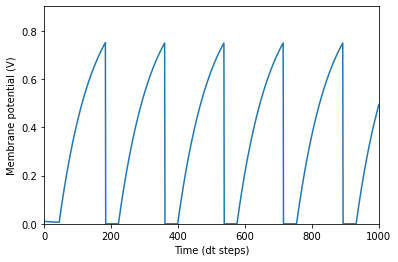

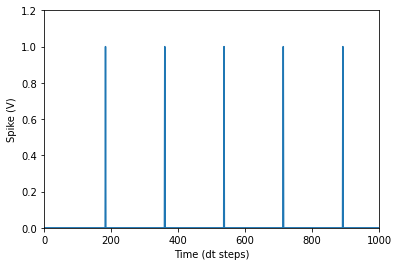

In [38]:
plot_membrane_potential(neurons[0][5].time, neurons[0][5].Vm)
plot_spikes(neurons[0][5].time, neurons[0][5].spikes)

In [0]:
layer = 0 
layer_spikes = np.zeros_like(neurons[layer][0].spikes)
for i in range(num_neurons):
    layer_spikes += neurons[layer][i].spikes

In [42]:
print (layer_spikes[0:200])     # the number of spike in layer 0 that input to layer 1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 0. 0.
 2. 0. 0. 0. 0. 2. 0. 2. 3. 1. 0. 0. 0. 2. 0. 1. 0. 1. 1. 1. 0. 2. 0. 0.
 0. 0. 2. 2. 0. 2. 0. 2. 0. 2. 1. 3. 1. 0. 2. 0. 3. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 2. 0. 1.]


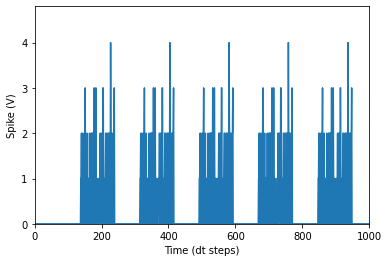

In [43]:
plot_spikes(neurons[0][0].time, layer_spikes)

In [0]:
neurons[1][0]=LIFNeuron()             # Re-initialise this neuron in case of multiple runs
neurons[1][0].spike_generator(layer_spikes)

In [50]:
start_time = 0
end_time = len(neurons[1][0].time)
print(start_time, end_time)

0 4002


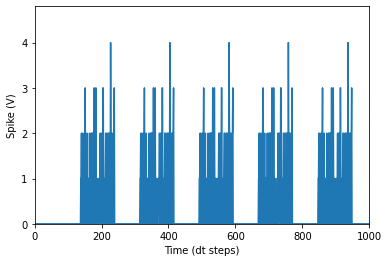

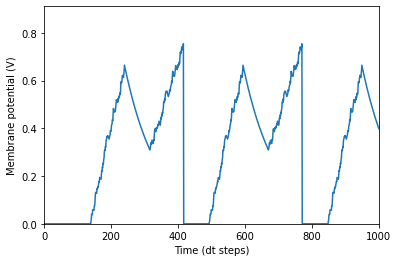

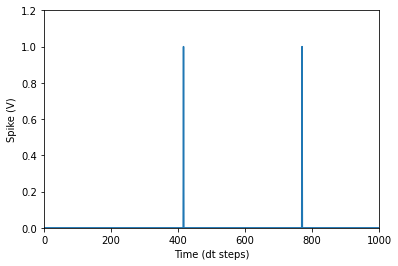

In [51]:
plot_spikes(neurons[0][0].time[start_time:end_time], layer_spikes[start_time:end_time])
plot_membrane_potential(neurons[1][0].time[start_time:end_time], neurons[1][0].Vm[start_time:end_time])
plot_spikes(neurons[1][0].time[start_time:end_time], neurons[1][0].spikes[start_time:end_time])